In [1]:
import pandas as pd
import numpy as np
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows as df_to_row

In [2]:
from szp_funcs import get_fio, create_full_res, print_df, load_groups, gku_inn, path_to_docs, to_double, path_to_data, create_res, gku

In [3]:
months = ['jan']

In [4]:
res = create_full_res(months)

In [4]:
ped, isp, aup = load_groups('input')

In [5]:
ppl = pd.read_excel(path_to_docs + 'school_ppl.xlsx')

In [6]:
ppl = ppl[ppl.ppl > 0]

In [7]:
fail = []#pd.read_excel(path_to_docs + '200_ppl_mar.xlsx')['snils'].to_list()

In [9]:
ppl

,inn,ppl
0,7713229928,2663
1,7743085543,113
3,7714093099,292
4,7709438340,1076
5,7705513678,2029
...,...,...
657,7716585000,3091
658,9715217689,2503
659,7728246980,2001
660,7708044657,1212


In [8]:
len(fail)

403

In [11]:
res = pd.merge(res, ppl, how='left', on='inn')

In [12]:
ppl_out = ppl.copy()

In [13]:
def give_ppl_grp(row):
    if row['ppl'] < 1001:
        return 1
    if row['ppl'] < 2001:
        return 2
    if row['ppl'] < 3001:
        return 3
    if row['ppl'] < 4001:
        return 4
    if row['ppl'] < 5001:
        return 5
    return 6

In [14]:
ppl_out['grp'] = ppl_out.apply(lambda row: give_ppl_grp(row), axis=1)

In [15]:
ppl_out

,inn,ppl,grp
0,7713229928,2663,3
1,7743085543,113,1
3,7714093099,292,1
4,7709438340,1076,2
5,7705513678,2029,3
...,...,...,...
657,7716585000,3091,4
658,9715217689,2503,3
659,7728246980,2001,3
660,7708044657,1212,2


In [19]:
print_df(ppl_out, 'Организации по группам контингента')

In [16]:
res

,inn,snils,sum_mar,stv_mar,job_mar,status_mar,ppl
0,7720258623,001-005-586 64,60434.74,1.0,Заведующий хозяйством,Работа,5935.0
1,7718309983,001-005-786 70,85809.12,1.0,Учитель,Работа,3036.0
2,7735601120,001-008-669 78,75124.20,1.0,Учитель,NaN,4137.0
3,7736614860,001-010-312 25,160599.30,1.0,Учитель,Работа,4456.0
4,7723169690,001-011-996 67,166752.15,1.0,Учитель,Работа,6950.0
...,...,...,...,...,...,...,...
166513,7734408766,215-089-180 55,25039.34,1.0,Специалист,Работа,1018.0
166514,7736614860,215-093-175 39,38178.00,1.0,Уборщик территории,Работа,4456.0
166515,7743020747,215-094-406 39,10015.73,1.0,Рабочий по комплексному обслуживанию и ремонту...,Работа,1454.0
166516,7736050780,215-120-882 18,13916.40,1.0,Рабочий по комплексному обслуживанию и ремонту...,Работа,2654.0


In [69]:
small_res = res[res.ppl < 2000]

In [75]:
fail_info = pd.merge(res[res.snils.isin(fail)], ppl, how='left', on='inn').rename(columns={'ppl_x': 'ppl'})

In [25]:
def pre_group(row):
    if row['ppl'] < 2000:
        return 1
    return 0

In [76]:
fail_info['gr'] = fail_info.apply(lambda row: pre_group(row), axis=1)

In [77]:
fail_info.groupby('gr').count()

,inn,snils,sum_mar,stv_mar,job_mar,ppl,ppl_y
gr,,,,,,,
0,377,377,377,377,377,375,375
1,26,26,26,26,26,26,26


In [78]:
jobs_interest_all = fail_info[fail_info.gr == 1][['snils', 'job_mar']].groupby('job_mar').count().sort_values('snils', ascending=False).index.to_list()

In [79]:
jobs_interest_all

['Ведущий экономист',
 'Начальник отдела',
 'Руководитель структурного подразделения',
 'Экономист',
 'Ведущий специалист',
 'Контрактный управляющий',
 'Ведущий специалист по кадрам',
 'Заведующий отделением',
 'Заведующий учебной частью',
 'Инженер-сметчик',
 'Начальник службы',
 'Художественный руководитель']

In [11]:
jobs_intrest = ['Ведущий экономист',
'Начальник отдела',
'Руководитель структурного подразделения',
'Ведущий специалист',
'Контрактный управляющий',
'Экономист']

In [80]:
res[res.job_mar == jobs_interest_all[-1]]

,inn,snils,sum_mar,stv_mar,job_mar,ppl
4097,7.719895e+09,001-695-749 45,55086.51,1.0,Художественный руководитель,5790.0
4108,7.736111e+09,001-697-876 59,256222.11,1.0,Художественный руководитель,2039.0
6549,7.715107e+09,002-238-764 09,170595.47,1.0,Художественный руководитель,4176.0
31073,7.736111e+09,019-729-684 96,168966.44,0.9,Художественный руководитель,2039.0
68612,7.734571e+09,053-539-740 70,290534.00,1.0,Художественный руководитель,756.0


In [81]:
res[(res.ppl < 2000) & (res.job_mar.isin(jobs_interest_all))][['job_mar', 'sum_mar']].groupby('job_mar').mean()

,sum_mar
job_mar,
Ведущий специалист,115095.705507
Ведущий специалист по кадрам,124139.566444
Ведущий экономист,143174.615250
Заведующий отделением,143106.741667
Заведующий учебной частью,142014.227059
Инженер-сметчик,106207.614065
Контрактный управляющий,122714.634628
Начальник отдела,146601.777000
Начальник службы,171901.002857


In [82]:
res[(res.ppl < 2000) & (res.job_mar.isin(jobs_interest_all))][['job_mar', 'sum_mar']].groupby('job_mar').count()

,sum_mar
job_mar,
Ведущий специалист,69
Ведущий специалист по кадрам,45
Ведущий экономист,80
Заведующий отделением,18
Заведующий учебной частью,17
Инженер-сметчик,155
Контрактный управляющий,121
Начальник отдела,40
Начальник службы,7


In [83]:
fail_par = pd.merge(res[(res.ppl < 2000) & (res.job_mar.isin(jobs_interest_all))][['job_mar', 'sum_mar']].groupby('job_mar').mean(), res[(res.ppl < 2000) & (res.job_mar.isin(jobs_interest_all))][['job_mar', 'sum_mar']].groupby('job_mar').count(), on='job_mar')
fail_par

,sum_mar_x,sum_mar_y
job_mar,,
Ведущий специалист,115095.705507,69
Ведущий специалист по кадрам,124139.566444,45
Ведущий экономист,143174.615250,80
Заведующий отделением,143106.741667,18
Заведующий учебной частью,142014.227059,17
Инженер-сметчик,106207.614065,155
Контрактный управляющий,122714.634628,121
Начальник отдела,146601.777000,40
Начальник службы,171901.002857,7


In [84]:
jobs_interest_all_more = fail_info[fail_info.gr == 0][['snils', 'job_mar']].groupby('job_mar').count().sort_values('snils', ascending=False).index.to_list()

In [85]:
fail_par_more = pd.merge(res[(res.ppl > 2000) & (res.job_mar.isin(jobs_interest_all_more))][['job_mar', 'sum_mar']].groupby('job_mar').mean(), res[(res.ppl > 2000) & (res.job_mar.isin(jobs_interest_all_more))][['job_mar', 'sum_mar']].groupby('job_mar').count(), on='job_mar')
fail_par_more

,sum_mar_x,sum_mar_y
job_mar,,
Администратор,87722.501320,500
Ведущий научный сотрудник,157547.343500,20
Ведущий специалист,129575.258783,460
Ведущий специалист по кадрам,142461.341204,191
Ведущий специалист по сетевому администрированию,138347.972340,47
Ведущий экономист,170983.735646,294
Ведущий юрисконсульт,194459.537692,13
Заведующий лабораторией,184479.155556,27
Заведующий отделением,158043.084466,103


In [62]:
print_df(res[res.ppl < 2000][['inn', 'ppl']].drop_duplicates(), 'temp')

In [63]:
print_df(res[res.ppl > 2000][['inn', 'ppl']].drop_duplicates(), 'temp')

In [86]:
fail_schools = res[res.snils.isin(fail)].drop_duplicates('inn')['inn'].to_list()

In [90]:
fail_par = pd.merge(fail_par, res[(res.ppl < 2000) & (res.job_mar.isin(jobs_interest_all)) & (res.inn.isin(fail_schools))][['job_mar', 'sum_mar']].groupby('job_mar').count(), on='job_mar')

In [92]:
res[(res.ppl < 2000) & (res.job_mar.isin(jobs_interest_all)) & (res.snils.isin(fail))][['job_mar', 'sum_mar']].groupby('job_mar').count()

,sum_mar
job_mar,
Ведущий специалист,2
Ведущий специалист по кадрам,1
Ведущий экономист,7
Заведующий отделением,1
Заведующий учебной частью,1
Инженер-сметчик,1
Контрактный управляющий,2
Начальник отдела,3
Начальник службы,1


In [91]:
fail_par

,sum_mar_x,sum_mar_y,sum_mar
job_mar,,,
Ведущий специалист,115095.705507,69,11
Ведущий специалист по кадрам,124139.566444,45,11
Ведущий экономист,143174.615250,80,10
Заведующий отделением,143106.741667,18,2
Заведующий учебной частью,142014.227059,17,5
Инженер-сметчик,106207.614065,155,13
Контрактный управляющий,122714.634628,121,8
Начальник отдела,146601.777000,40,10
Начальник службы,171901.002857,7,3


In [93]:
res[(res.snils.isin(fail))][['job_mar', 'sum_mar']].groupby('job_mar').count()

,sum_mar
job_mar,
Администратор,9
Ведущий научный сотрудник,1
Ведущий специалист,24
Ведущий специалист по кадрам,16
Ведущий специалист по сетевому администрированию,2
Ведущий экономист,81
Ведущий юрисконсульт,1
Заведующий лабораторией,5
Заведующий отделением,25


In [95]:
jbs = ['Экономист', 'Ведущий экономист', 'Контрактный управляющий']

In [109]:
pt1 = res[(res.inn.isin(fail_schools)) & (res.job_mar.isin(jbs)) & (res.ppl < 2000)][['inn', 'job_mar', 'snils']].groupby(['inn', 'job_mar']).count().reset_index()

In [110]:
pt2 = res[(res.snils.isin(fail)) & (res.job_mar.isin(jbs)) & (res.ppl < 2000)][['inn', 'job_mar', 'snils']].groupby(['inn', 'job_mar']).count().reset_index()

In [111]:
ans = pd.merge(pt1, pt2, how='left', on=['inn', 'job_mar']).fillna(0)

In [112]:
ans

,inn,job_mar,snils_x,snils_y
0,7.704040e+09,Ведущий экономист,2,2.0
1,7.704040e+09,Контрактный управляющий,1,0.0
2,7.709330e+09,Ведущий экономист,1,1.0
3,7.713386e+09,Ведущий экономист,1,0.0
4,7.713386e+09,Контрактный управляющий,1,0.0
5,7.713386e+09,Экономист,2,0.0
6,7.715398e+09,Ведущий экономист,1,0.0
7,7.715398e+09,Контрактный управляющий,1,1.0
8,7.715398e+09,Экономист,1,0.0
9,7.717666e+09,Экономист,1,0.0


In [113]:
print_df(ans, 'by_inn_job')

In [9]:
def load_res(file):
    df = pd.read_excel(path_to_data + file + '.xlsx')
    df.stv = df.apply(lambda row: to_double(row, 'stv'), axis=1)
    sample = df[(df.type == 'Основное место работы') | (df.type == 'Внутреннее совместительство')]
    sums = sample.iloc[:, [0,1,2,3]].groupby(['inn', 'snils']).sum().reset_index().groupby('snils').max().reset_index()
    sums = pd.merge(sums, sample[sample.type == 'Основное место работы'], how='left', on=['inn', 'snils'])
    sums = sums[(sums.stv >= 1.0) & (sums.status == 'Работа') & (sums.day == 1) & (sums.status_pref == 'Работа')]
    sums = sums[['inn', 'snils', 'sum_x', 'stv', 'job']].drop_duplicates(['inn', 'snils', 'sum_x'])
    sums = sums.rename(columns = {'inn_y': 'inn', 'sum_x': 'sum_' + file, 'job':'job_' + file, 'stv': 'stv_' + file})
    return sums

In [10]:
for_szp = load_res(months[0])

In [11]:
for_szp

,inn,snils,sum_mar,stv_mar,job_mar
1,7718309983,001-005-786 70,85809.12,1.0,Учитель
3,7736614860,001-010-312 25,160599.30,1.0,Учитель
4,7723169690,001-011-996 67,166752.15,1.0,Учитель
5,7727123537,001-017-453 65,86627.92,1.0,Секретарь руководителя
6,7733088746,001-017-484 72,86787.10,1.0,Учитель
...,...,...,...,...,...
166528,7727191008,214-860-432 51,54757.78,1.0,Уборщик служебных и производственных помещений
166529,7714890087,214-860-989 83,71680.00,1.0,Рабочий по комплексному обслуживанию и ремонту...
166532,7709944805,214-887-443 92,54536.00,1.0,Уборщик служебных и производственных помещений
166535,7734247614,214-988-963 20,65000.00,1.0,Уборщик территории


In [14]:
jobs_intrest_v2 = ['Ведущий экономист',
'Инженер-сметчик',
'Ведущий специалист',
'Специалист',
'Ведущий специалист по кадрам',
'Контрактный управляющий',
]

In [13]:
job_int = 'Ведущий экономист'

In [68]:
for_grph = for_szp[(for_szp.job_mar == job_int)& (for_szp.sum_mar < 200000)] 

In [55]:
def give_sum_gr(row):
    if row['sum_mar'] < 100000:
        return 1
    if row['sum_mar'] < 150000:
        return 2
    return 3

In [69]:
for_grph

,inn,snils,sum_mar,stv_mar,job_mar
27,7720307694,001-033-978 83,121311.64,1.0,Ведущий экономист
144,7736132129,001-148-073 82,145295.36,1.0,Ведущий экономист
204,7736682034,001-166-819 01,192381.36,1.0,Ведущий экономист
535,7715789629,001-200-220 29,100901.83,1.0,Ведущий экономист
862,7731243019,001-241-901 71,128840.00,1.0,Ведущий экономист
...,...,...,...,...,...
147117,7703738796,162-762-567 84,115962.40,1.0,Ведущий экономист
149309,7743085720,166-594-078 10,120909.09,1.0,Ведущий экономист
150293,7736110982,168-096-564 11,106863.75,1.0,Ведущий экономист
152658,7715982037,171-779-885 28,148296.00,1.0,Ведущий экономист


In [70]:
print_df(for_grph, 'менее 200 ведэк')

In [56]:
for_grph['gr'] = for_grph.apply(lambda row: give_sum_gr(row), axis=1)

C:\Users\PetukhovMD\AppData\Local\Temp\ipykernel_22480\1525785701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_grph['gr'] = for_grph.apply(lambda row: give_sum_gr(row), axis=1)


In [59]:
print_df(for_grph[['sum_mar', 'gr']], 'Для графика распр ведэконом')

In [64]:
for_szp[(for_szp.job_mar == job_int)]# & (for_szp.sum_mar < 200000)]

,inn,snils,sum_mar,stv_mar,job_mar
27,7720307694,001-033-978 83,121311.64,1.0,Ведущий экономист
144,7736132129,001-148-073 82,145295.36,1.0,Ведущий экономист
204,7736682034,001-166-819 01,192381.36,1.0,Ведущий экономист
535,7715789629,001-200-220 29,100901.83,1.0,Ведущий экономист
651,7723356160,001-213-248 58,287500.00,1.0,Ведущий экономист
...,...,...,...,...,...
150293,7736110982,168-096-564 11,106863.75,1.0,Ведущий экономист
152658,7715982037,171-779-885 28,148296.00,1.0,Ведущий экономист
153416,7720807143,173-003-445 22,107724.20,1.0,Ведущий экономист
153924,7729413009,173-649-901 04,201888.93,1.0,Ведущий экономист


In [28]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Зарплата', ylabel='Количество работников'>

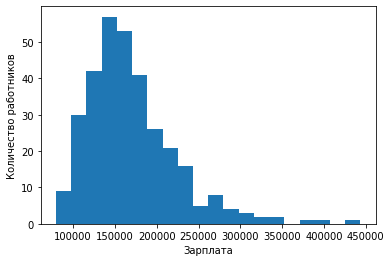

In [67]:
a = for_grph[['sum_mar']].plot.hist(bins = 20, histtype='stepfilled',legend=False, rwidth=2)
a.set_xlabel('Зарплата')
a.set_ylabel('Количество работников')
a

In [22]:
gku

['ГБУ МГДУ',
 'ГАОУ ДПО ЦПМ',
 'ГАОУ ДПО МЦКО',
 'ГКУ ЦФО ДОНМ',
 'ГБУ ГППЦ ДОНМ',
 'ГКУ СФК ДОНМ',
 'ГКУ Дирекция ДОНМ',
 'ГБОУ ДПО МЦПС',
 'ГБОУ ГМЦ ДОНМ',
 'ГКУ Дирекция по строительству и реконструкции ДОНМ',
 'ГАОУ ДПО Корпоративный университет',
 'ГАУ Центр цифровизации образования',
 'ГАУ Медиацентр',
 'ГАОУ ДПО МЦРПО']

In [19]:
gku_inn

[7702061938,
 7725618950,
 7725539709,
 9718071371,
 7726317748,
 7704191153,
 9705101759,
 7719210793,
 7705399348,
 7705020295,
 7714239823,
 7727190237,
 7718924940,
 7707329480]

In [56]:
t_szp = for_szp[(for_szp.inn.isin(gku_inn) == False) & (for_szp['sum_' + months[0]] > 54500)][['inn', 'job_' + months[0], 'sum_' + months[0], 'snils']]

In [13]:
sch_ppl = pd.read_excel(path_to_docs + 'school_ppl.xlsx')

In [14]:
sch_ppl

,inn,ppl
0,7713229928,2663
1,7743085543,113
2,7704271031,0
3,7714093099,292
4,7709438340,1076
...,...,...
658,9715217689,2503
659,7728246980,2001
660,7708044657,1212
661,7721221802,0


In [57]:
szp_with_ppl = pd.merge(t_szp, sch_ppl, how='left', on='inn')

In [16]:
def make_grp(row):
    if row['ppl'] > 4000:
        return 1
    if row['ppl'] < 2000:
        return 3
    return 2

In [17]:
ruk = ['Заведующий лабораторией',
'Заведующий отделением',
'Заведующий практикой',
'Заведующий учебной частью',
'Заведующий хозяйством',
'Заместитель начальника управления',
'Начальник отдела',
'Начальник отдела кадров',
'Начальник службы',
'Начальник управления',
'Режиссер',
'Руководитель контрактной службы',
'Руководитель проектной группы',
'Руководитель проектов',
'Руководитель структурного подразделения',
'Руководитель учебно-производственной практики',
'Художественный руководитель'
# 'Заведующий учебной мастерской',#new apr
# 'Заместитель начальника отдела',#new apr
# 'Советник'#new apr
]
nauch = ['Ведущий научный сотрудник',
'Младший научный сотрудник',
'Научный сотрудник',
'Старший научный сотрудник',
'Ученый секретарь'
]
kontr = ['Контрактный управляющий',
'Специалист по закупкам'
]
it = ['Ведущий специалист по сетевому администрированию',
'Специалист по защите информации',
'Специалист по интернет-маркетингу',
'Специалист по сетевому администрированию',
'Старший администратор баз данных'
# 'Старший специалист по сетевому администрированию',#new apr
# 'Ведущий программист',#new apr
# 'Инженер по защите информации'#new apr
]
spez = ['Ведущий специалист',
'Специалист',
'Специалист по охране труда',
'Специалист по связям с общественностью',
'Специалист по учебно-методической работе',
'Эксперт'
]
house = ['Инженер-сметчик',
'Инженер-электроник',
'Комендант',
'Специалист административно-хозяйственной деятельности',
'Старший мастер',
'Техник по эксплуатации зданий',
'Техник-смотритель'
# 'Плотник',#new apr
# 'Техник',#new apr
# 'Ведущий инженер-сметчик',#new apr
# 'Мастер по ремонту',#new apr
# 'Инженер'#new apr
]
hr = ['Ведущий специалист по кадрам',
'Ведущий юрисконсульт',
'Специалист по кадрам',
'Старший специалист по кадрам',
'Юрисконсульт'
# 'ведущий Документовед',#new apr
# 'Делопроизводитель'#new apr
]
econ = ['Ведущий экономист',
'Старший экономист',
'Экономист'
]
admin = ['Администратор',
'Помощник ректора',
'Секретарь руководителя'
]

In [18]:
def make_job_grp(row):
    if row['job_' + months[0]] in ruk:
        return 'Руководящий состав среднего звена'
    if row['job_' + months[0]] in nauch:
        return 'Научные работники'
    if row['job_' + months[0]] in kontr:
        return 'Контрактные управляющие и закупки'
    if row['job_' + months[0]] in it:
        return 'IT - специалисты'
    if row['job_' + months[0]] in spez:
        return 'Специалисты'
    if row['job_' + months[0]] in house:
        return 'Обслуживание и содержание зданий (помещений)'
    if row['job_' + months[0]] in hr:
        return 'Кадры и юрисконсульт'
    if row['job_' + months[0]] in econ:
        return 'Экономисты'
    if row['job_' + months[0]] in admin:
        return 'Администраторы и секретари'
    return None

In [58]:
szp_with_ppl['grp'] = szp_with_ppl.apply(lambda row: make_grp(row), axis=1)

In [59]:
szp_with_ppl['job_grp'] = szp_with_ppl.apply(lambda row: make_job_grp(row), axis=1)

In [60]:
szp_with_ppl

,inn,job_mar,sum_mar,snils,ppl,grp,job_grp
0,7718309983,Учитель,85809.12,001-005-786 70,3036,2,None
1,7736614860,Учитель,160599.30,001-010-312 25,4456,1,None
2,7723169690,Учитель,166752.15,001-011-996 67,6950,1,None
3,7727123537,Секретарь руководителя,86627.92,001-017-453 65,4216,1,Администраторы и секретари
4,7733088746,Учитель,86787.10,001-017-484 72,3486,2,None
...,...,...,...,...,...,...,...
119704,7727191008,Уборщик служебных и производственных помещений,54757.78,214-860-432 51,3026,2,None
119705,7714890087,Рабочий по комплексному обслуживанию и ремонту...,71680.00,214-860-989 83,4294,1,None
119706,7709944805,Уборщик служебных и производственных помещений,54536.00,214-887-443 92,6242,1,None
119707,7734247614,Уборщик территории,65000.00,214-988-963 20,1424,3,None


In [28]:
szp_all = szp_with_ppl[['job_grp', 'sum_' + months[0]]].groupby(['job_grp']).mean().reset_index()
szp_all_min = szp_with_ppl[['job_grp', 'sum_' + months[0]]].groupby(['job_grp']).min().reset_index()
szp_all_max = szp_with_ppl[['job_grp', 'sum_' + months[0]]].groupby(['job_grp']).max().reset_index()

In [29]:
szp_all = pd.merge(szp_all, szp_all_min, how='left', on=['job_grp'])
szp_all = pd.merge(szp_all, szp_all_max, how='left', on=['job_grp'])

In [44]:
inns = [(7717043346, 'ГАОУ ВО МГПУ'), (7723356160, 'ГБПОУ 26 КАДР'), (7734570529, 'ГАУДО Домисолька')]

In [61]:
szp_with_ppl[(szp_with_ppl['inn'] == inns[0][0]) & (szp_with_ppl['sum_' + months[0]] > 200000) & (szp_with_ppl['job_grp'] == 'Научные работники')]

,inn,job_mar,sum_mar,snils,ppl,grp,job_grp
14894,7717043346,Ведущий научный сотрудник,217650.00,014-884-359 67,12259,1,Научные работники
22835,7717043346,Ведущий научный сотрудник,205050.00,019-642-816 66,12259,1,Научные работники
41217,7717043346,Ведущий научный сотрудник,205795.00,033-839-515 65,12259,1,Научные работники
45750,7717043346,Старший научный сотрудник,258673.39,042-114-151 87,12259,1,Научные работники
51983,7717043346,Ведущий научный сотрудник,222009.77,053-986-542 02,12259,1,Научные работники
53125,7717043346,Ученый секретарь,309523.00,056-339-302 61,12259,1,Научные работники
65278,7717043346,Научный сотрудник,222668.96,077-132-194 58,12259,1,Научные работники
105608,7717043346,Младший научный сотрудник,214550.00,158-823-823 04,12259,1,Научные работники


In [49]:
for sch in inns:
    szp_t = szp_with_ppl[(szp_with_ppl['inn'] == sch[0]) & (szp_with_ppl['sum_' + months[0]] > 200000)][['job_grp', 'sum_' + months[0]]].groupby(['job_grp']).mean().reset_index()
    szp_t_min = szp_with_ppl[(szp_with_ppl['inn'] == sch[0]) & (szp_with_ppl['sum_' + months[0]] > 200000)][['job_grp', 'sum_' + months[0]]].groupby(['job_grp']).min().reset_index()
    szp_t_max = szp_with_ppl[(szp_with_ppl['inn'] == sch[0]) & (szp_with_ppl['sum_' + months[0]] > 200000)][['job_grp', 'sum_' + months[0]]].groupby(['job_grp']).max().reset_index()
    szp_t_cnt = szp_with_ppl[(szp_with_ppl['inn'] == sch[0]) & (szp_with_ppl['sum_' + months[0]] > 200000)][['job_grp', 'sum_' + months[0]]].groupby(['job_grp']).count().reset_index().rename(columns={'sum_' + months[0]: 'cnt'})
    szp_t = pd.merge(szp_t, szp_t_min, how='left', on=['job_grp'])
    szp_t = pd.merge(szp_t, szp_t_max, how='left', on=['job_grp'])
    szp_t = pd.merge(szp_t, szp_t_cnt, how='left', on=['job_grp'])
    szp_t = szp_t.rename(columns={'job_'  + months[0]:'job', 'sum_'  + months[0]:'max', 'sum_' + months[0] +'_x':'mean', 'sum_' + months[0] +'_y':'min'})
    print_df(szp_t, 'Вилка организации 200+ ' + months[0] + ' ' + sch[1])

In [48]:
szp_t

,job_grp,mean,min,max,cnt
0,IT - специалисты,173592.060000,173592.06,173592.06,1
1,Кадры и юрисконсульт,116111.650000,116111.65,116111.65,1
2,Контрактные управляющие и закупки,157826.050000,157826.05,157826.05,1
3,Обслуживание и содержание зданий (помещений),160094.850000,160094.85,160094.85,1
4,Руководящий состав среднего звена,215633.285000,140732.57,290534.00,2
5,Специалисты,157320.796667,129443.80,201344.10,3
6,Экономисты,201344.100000,201344.10,201344.10,1


In [39]:
szp_all = szp_all.rename(columns={'job_'  + months[0]:'job', 'sum_'  + months[0]:'max', 'sum_' + months[0] +'_x':'mean', 'sum_' + months[0] +'_y':'min'})

In [40]:
szp_all

,job_grp,mean,min,max
0,IT - специалисты,111465.596781,54547.04,243700.00
1,Администраторы и секретари,92265.200016,54503.28,248781.40
2,Кадры и юрисконсульт,117841.452538,54831.25,280520.00
3,Контрактные управляющие и закупки,122410.805932,60193.48,240000.00
4,Научные работники,162215.084615,54550.00,309523.00
5,Обслуживание и содержание зданий (помещений),110400.954318,54511.81,311050.74
6,Руководящий состав среднего звена,118397.184807,54513.00,428900.00
7,Специалисты,99789.970711,54500.80,358818.00
8,Экономисты,137049.269667,54549.97,443608.00


In [33]:
print_df(szp_all, 'СЗП + вилка все по группам ' + months[0])

In [22]:
szp = szp_with_ppl[['grp', 'job_grp', 'sum_' + months[0]]].groupby(['grp', 'job_grp']).mean().reset_index()

In [23]:
szp

,grp,job_grp,sum_mar
0,1,IT - специалисты,117258.903650
1,1,Администраторы и секретари,91213.941559
2,1,Кадры и юрисконсульт,122591.173813
3,1,Контрактные управляющие и закупки,125446.506483
4,1,Научные работники,162215.084615
5,1,Обслуживание и содержание зданий (помещений),112647.630852
6,1,Руководящий состав среднего звена,123347.763899
7,1,Специалисты,101082.892308
8,1,Экономисты,148614.527114
9,2,IT - специалисты,110722.188145


In [132]:
szp_max = szp_with_ppl[['grp', 'job_grp', 'sum_' + months[0]]].groupby(['grp', 'job_grp']).max().reset_index()

In [133]:
szp_min = szp_with_ppl[['grp', 'job_grp', 'sum_' + months[0]]].groupby(['grp', 'job_grp']).min().reset_index()

In [134]:
szp = pd.merge(szp, szp_min, how='left', on=['grp', 'job_grp'])

In [135]:
szp = pd.merge(szp, szp_max, how='left', on=['grp', 'job_grp'])

In [136]:
szp = szp.rename(columns={'job_'  + months[0]:'job', 'sum_'  + months[0]:'max', 'sum_' + months[0] +'_x':'mean', 'sum_' + months[0] +'_y':'min'})

In [137]:
#Final szp
szp

,grp,job_grp,mean,min,max
0,1,IT - специалисты,117258.903650,62601.00,243700.00
1,1,Администраторы и секретари,91213.941559,54526.17,248781.40
2,1,Кадры и юрисконсульт,122591.173813,64638.00,266840.00
3,1,Контрактные управляющие и закупки,125446.506483,64173.61,240000.00
4,1,Научные работники,162215.084615,54550.00,309523.00
5,1,Обслуживание и содержание зданий (помещений),112647.630852,54615.00,311050.74
6,1,Руководящий состав среднего звена,123347.763899,54513.00,428900.00
7,1,Специалисты,101082.892308,54514.87,358818.00
8,1,Экономисты,148614.527114,54549.97,443608.00
9,2,IT - специалисты,110722.188145,54547.04,235300.00


In [129]:
fails = []#pd.read_excel(path_to_docs +  months[0] + '_inn_fail.xlsx')['inn'].to_list()

In [130]:
len(fails)

153

In [123]:
szp_with_ppl

,inn,job_mar,sum_mar,ppl,grp,job_grp
0,7718309983,Учитель,85809.12,3036,2,None
1,7736614860,Учитель,160599.30,4456,1,None
2,7723169690,Учитель,166752.15,6950,1,None
3,7727123537,Секретарь руководителя,86627.92,4216,1,Администраторы и секретари
4,7733088746,Учитель,86787.10,3486,2,None
...,...,...,...,...,...,...
119704,7727191008,Уборщик служебных и производственных помещений,54757.78,3026,2,None
119705,7714890087,Рабочий по комплексному обслуживанию и ремонту...,71680.00,4294,1,None
119706,7709944805,Уборщик служебных и производственных помещений,54536.00,6242,1,None
119707,7734247614,Уборщик территории,65000.00,1424,3,None


In [138]:
szp_with_ppl[(szp_with_ppl.job_grp == 'Научные работники') & (szp_with_ppl.grp == 1)]

,inn,job_mar,sum_mar,ppl,grp,job_grp
12998,7717043346,Ведущий научный сотрудник,144100.00,12259,1,Научные работники
14554,7717043346,Научный сотрудник,90975.00,12259,1,Научные работники
14739,7717043346,Старший научный сотрудник,107800.00,12259,1,Научные работники
14894,7717043346,Ведущий научный сотрудник,217650.00,12259,1,Научные работники
22835,7717043346,Ведущий научный сотрудник,205050.00,12259,1,Научные работники
37628,7717043346,Ведущий научный сотрудник,126600.00,12259,1,Научные работники
40040,7717043346,Ведущий научный сотрудник,140100.00,12259,1,Научные работники
41217,7717043346,Ведущий научный сотрудник,205795.00,12259,1,Научные работники
44871,7717043346,Старший научный сотрудник,125300.00,12259,1,Научные работники
45510,7717043346,Ведущий научный сотрудник,177150.00,12259,1,Научные работники


In [139]:
min_good_sch = szp_with_ppl[szp_with_ppl.inn.isin(fails) == False][['grp', 'job_grp', 'sum_' + months[0]]].groupby(['grp', 'job_grp']).min().reset_index().rename(columns={'sum_' + months[0]: 'min_good_sch'})
max_good_sch = szp_with_ppl[szp_with_ppl.inn.isin(fails) == False][['grp', 'job_grp', 'sum_' + months[0]]].groupby(['grp', 'job_grp']).max().reset_index().rename(columns={'sum_' + months[0]: 'max_good_sch'})
szp_good_sch = szp_with_ppl[szp_with_ppl.inn.isin(fails) == False][['grp', 'job_grp', 'sum_' + months[0]]].groupby(['grp', 'job_grp']).mean().reset_index().rename(columns={'sum_' + months[0]: 'szp_good_sch'})

min_bad_sch_bad_ppl = szp_with_ppl[(szp_with_ppl.inn.isin(fails)) & (szp_with_ppl['sum_' + months[0]] > 200000)][['grp', 'job_grp', 'sum_' + months[0]]].groupby(['grp', 'job_grp']).min().reset_index().rename(columns={'sum_' + months[0]: 'min_bad_sch_bad_ppl'})
max_bad_sch_bad_ppl = szp_with_ppl[(szp_with_ppl.inn.isin(fails)) & (szp_with_ppl['sum_' + months[0]] > 200000)][['grp', 'job_grp', 'sum_' + months[0]]].groupby(['grp', 'job_grp']).max().reset_index().rename(columns={'sum_' + months[0]: 'max_bad_sch_bad_ppl'})
szp_bad_sch_bad_ppl = szp_with_ppl[(szp_with_ppl.inn.isin(fails)) & (szp_with_ppl['sum_' + months[0]] > 200000)][['grp', 'job_grp', 'sum_' + months[0]]].groupby(['grp', 'job_grp']).mean().reset_index().rename(columns={'sum_' + months[0]: 'szp_bad_sch_bad_ppl'})

min_bad_sch_good_ppl = szp_with_ppl[(szp_with_ppl.inn.isin(fails)) & (szp_with_ppl['sum_' + months[0]] < 200000)][['grp', 'job_grp', 'sum_' + months[0]]].groupby(['grp', 'job_grp']).min().reset_index().rename(columns={'sum_' + months[0]: 'min_bad_sch_good_ppl'})
max_bad_sch_good_ppl = szp_with_ppl[(szp_with_ppl.inn.isin(fails)) & (szp_with_ppl['sum_' + months[0]] < 200000)][['grp', 'job_grp', 'sum_' + months[0]]].groupby(['grp', 'job_grp']).max().reset_index().rename(columns={'sum_' + months[0]: 'max_bad_sch_good_ppl'})
szp_bad_sch_good_ppl = szp_with_ppl[(szp_with_ppl.inn.isin(fails)) & (szp_with_ppl['sum_' + months[0]] < 200000)][['grp', 'job_grp', 'sum_' + months[0]]].groupby(['grp', 'job_grp']).mean().reset_index().rename(columns={'sum_' + months[0]: 'szp_bad_sch_good_ppl'})

In [140]:
szp = pd.merge(szp, min_good_sch, how='left', on=['grp', 'job_grp'])
szp = pd.merge(szp, max_good_sch, how='left', on=['grp', 'job_grp'])
szp = pd.merge(szp, szp_good_sch, how='left', on=['grp', 'job_grp'])
szp = pd.merge(szp, min_bad_sch_bad_ppl, how='left', on=['grp', 'job_grp'])
szp = pd.merge(szp, max_bad_sch_bad_ppl, how='left', on=['grp', 'job_grp'])
szp = pd.merge(szp, szp_bad_sch_bad_ppl, how='left', on=['grp', 'job_grp'])
szp = pd.merge(szp, min_bad_sch_good_ppl, how='left', on=['grp', 'job_grp'])
szp = pd.merge(szp, max_bad_sch_good_ppl, how='left', on=['grp', 'job_grp'])
szp = pd.merge(szp, szp_bad_sch_good_ppl, how='left', on=['grp', 'job_grp'])

In [141]:
szp

,grp,job_grp,mean,min,max,min_good_sch,max_good_sch,szp_good_sch,min_bad_sch_bad_ppl,max_bad_sch_bad_ppl,szp_bad_sch_bad_ppl,min_bad_sch_good_ppl,max_bad_sch_good_ppl,szp_bad_sch_good_ppl
0,1,IT - специалисты,117258.903650,62601.00,243700.00,69700.00,172413.56,111196.654714,208456.18,243700.00,229485.393333,62601.00,193826.40,117949.281260
1,1,Администраторы и секретари,91213.941559,54526.17,248781.40,54526.17,184934.00,84316.772941,201255.00,248781.40,224942.500000,54700.00,194980.00,90737.736590
2,1,Кадры и юрисконсульт,122591.173813,64638.00,266840.00,70115.00,191200.00,111321.475246,200415.14,266840.00,225621.918333,64638.00,198200.00,127016.429708
3,1,Контрактные управляющие и закупки,125446.506483,64173.61,240000.00,64200.00,196720.00,116761.775876,202800.00,240000.00,217166.022222,64173.61,197550.00,125576.839000
4,1,Научные работники,162215.084615,54550.00,309523.00,NaN,NaN,NaN,205050.00,309523.00,231990.015000,54550.00,198653.98,131204.004444
5,1,Обслуживание и содержание зданий (помещений),112647.630852,54615.00,311050.74,57439.20,199043.12,106428.905119,204400.00,311050.74,235773.360000,54615.00,199400.00,111773.358812
6,1,Руководящий состав среднего звена,123347.763899,54513.00,428900.00,56341.08,196069.44,104085.663333,200047.50,428900.00,245378.710139,54513.00,198146.55,113793.106224
7,1,Специалисты,101082.892308,54514.87,358818.00,54514.87,194640.00,92964.998627,200586.00,358818.00,240622.603077,54515.00,199800.00,100721.981310
8,1,Экономисты,148614.527114,54549.97,443608.00,54549.97,199865.58,128172.291735,204256.64,443608.00,249139.852973,62000.00,197919.85,133154.184865
9,2,IT - специалисты,110722.188145,54547.04,235300.00,54580.98,195047.49,107659.916117,207505.72,235300.00,225092.192500,54547.04,185000.00,112146.611325


In [53]:
szp.describe()

,grp,mean,min,max
count,25.000000,25.000000,25.000000,25.000000
mean,1.960000,114951.689672,57182.642400,282078.015600
std,0.840635,16976.561041,4613.076308,77599.793594
min,1.000000,91213.941559,54500.800000,174100.000000
25%,1.000000,101082.892308,54526.170000,228050.000000
50%,2.000000,115161.141967,54615.000000,266840.000000
75%,3.000000,122591.173813,56300.000000,319020.000000
max,3.000000,162215.084615,70640.000000,443608.000000


In [128]:
print_df(szp, 'СЗП + вилка все по контингенту ' + months[0])

In [133]:
res

,inn,snils,sum_apr,stv_apr,job_apr,status_apr
0,7720258623,001-005-586 64,114968.88,1.0,Заведующий хозяйством,Работа
1,7718309983,001-005-786 70,72633.85,1.0,Учитель,Работа
2,7735601120,001-008-669 78,39898.73,1.0,Учитель,Болезнь
3,7736614860,001-010-312 25,147344.30,1.0,Учитель,Работа
4,7723169690,001-011-996 67,156752.15,1.0,Учитель,Работа
...,...,...,...,...,...,...
166152,7727191008,215-303-665 25,47243.64,1.0,Уборщик территории,Работа
166153,7733113047,215-317-586 48,54216.28,1.0,Уборщик служебных и производственных помещений,Работа
166154,7734233259,215-465-719 66,50969.40,1.0,Уборщик территории,Работа
166155,7734233259,215-573-458 67,19127.26,1.0,Рабочий по комплексному обслуживанию и ремонту...,Работа
